In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import pearsonr

## Erdős-Rényi graph
First create an Erdős-Rényi graph

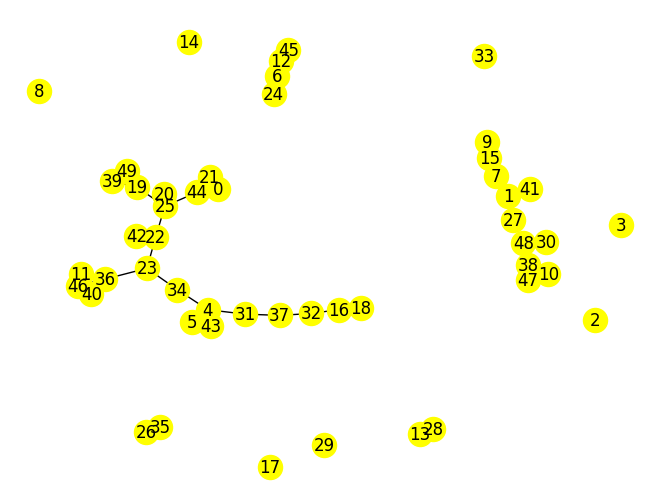

In [2]:
ER = nx.erdos_renyi_graph(50,0.03,seed=19)
nx.draw(ER,with_labels=True,node_color='yellow')

In [3]:
cc = list(nx.connected_components(ER))

In [4]:
ccsize = [len(c) for c in cc]
print(ccsize)

[24, 11, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1]


In [5]:
largest = cc[ccsize.index(max(ccsize))]
print(largest)

{0, 4, 5, 11, 16, 18, 19, 20, 21, 22, 23, 25, 31, 32, 34, 36, 37, 39, 40, 42, 43, 44, 46, 49}


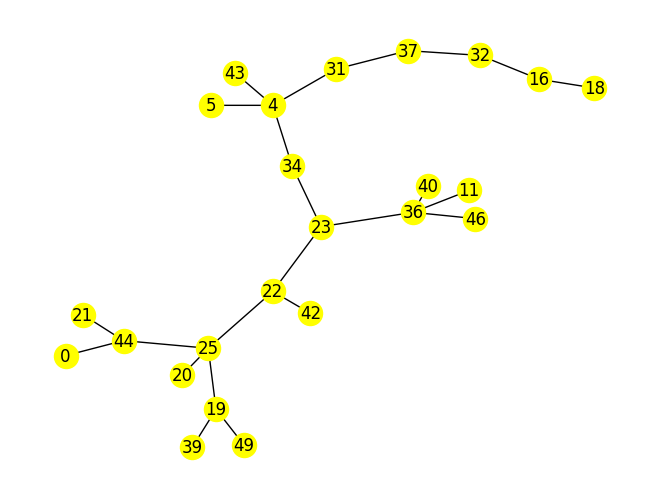

In [6]:
G = ER.subgraph(largest)
nx.draw(G,with_labels=True,node_color='yellow')

(array([ 7., 23., 10.,  7.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

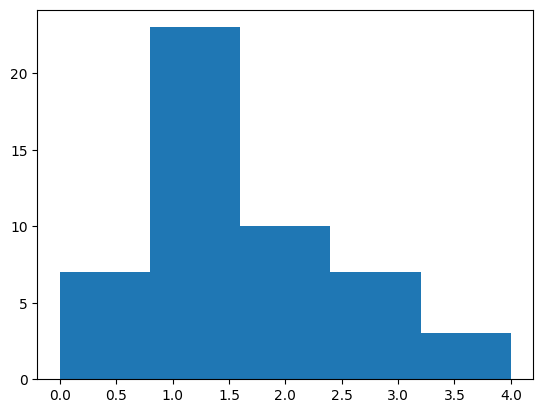

In [7]:
plt.hist(list(dict(ER.degree()).values()),bins=5)

In [8]:
#Many lists: enamble average
N = 50
p = 0.05
sample = 100
degrees = []
for _ in range(sample):
    ER = nx.erdos_renyi_graph(N,p)
    degrees = degrees + list(dict(ER.degree()).values())
print(len(degrees))

5000


(array([ 407., 1009., 1340., 1069.,  668.,  352.,  106.,   37.,    8.,
           4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

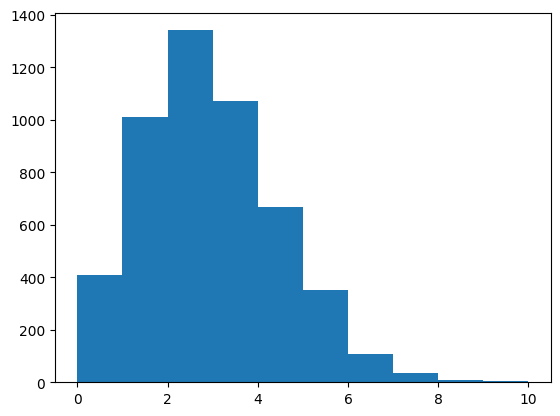

In [9]:
plt.hist(degrees)

In [10]:
mean = np.array(degrees).mean()
print(mean)

2.4648


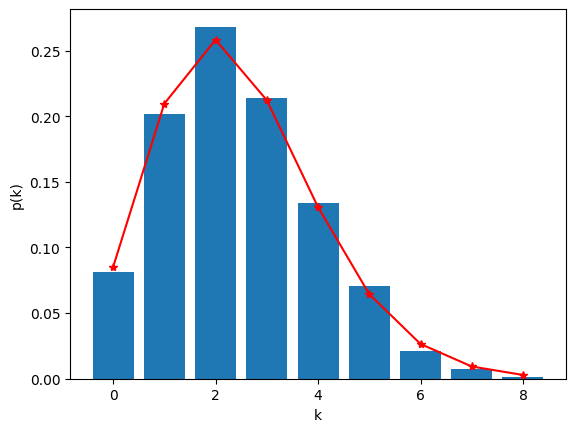

In [11]:
bins = np.arange(10) - 0.5
plt.hist(degrees,density=True,bins=bins,rwidth=0.8);
x = np.arange(9)
plt.plot(x,poisson.pmf(x, mu = mean),"r*-")
plt.xlabel("k")
plt.ylabel("p(k)")
plt.savefig("ER_kdist%d_%g.pdf" % (N,p))

In [12]:
h,b = np.histogram(degrees,bins=bins,density=True)
print(h)
print(b)

[0.08146517 0.20196157 0.26821457 0.21397118 0.13370697 0.07045637
 0.02121697 0.00740592 0.00160128]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


## Coefficeint of determination

https://en.wikipedia.org/wiki/Coefficient_of_determination

If $\bar{y}$ is the mean of the observed data:
$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i $$
then the variability of the data set can be measured with two Mean squared error formulas:
* The sum of squares of residuals, also called the residual sum of squares:
$$SS_\text{res}=\sum_i (y_i - f_i)^2,$$
* The total sum of squares (proportional to the variance of the data):
$$SS_\text{tot}=\sum_i (y_i - \bar{y})^2$$

The most general definition of the coefficient of determination is
$$R^2 = 1 - {SS_{\rm res}\over SS_{\rm tot}} $$

In the best case, the modeled values exactly match the observed values, which results in $SS_\text{res}=0$ and $R^2=1$. A baseline model, which always predicts $\bar y$, will have $R^2=0$.

In [13]:
# in matrix format, between all pairs of data
np.corrcoef(h, poisson.pmf(x, mu = mean))

array([[1.        , 0.99859078],
       [0.99859078, 1.        ]])

In [14]:
#or the just between original and fitted, the result is really good.
np.corrcoef(h, poisson.pmf(x, mu = mean))[0,1]

np.float64(0.9985907816210831)

### Assortativity

In [15]:
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    print(neighdeg)


[3]
[1, 2, 2, 1]
[4]
[4]
[1, 2]
[2]
[4, 1, 1]
[4]
[3]
[3, 4, 1]
[3, 2, 4]
[3, 1, 3, 3]
[4, 2]
[2, 2]
[4, 3]
[1, 3, 1, 1]
[2, 2]
[3]
[4]
[3]
[4]
[1, 1, 4]
[4]
[3]


In [16]:
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    print(G.degree(i),np.array(neighdeg).mean())

1 3.0
4 1.5
1 4.0
1 4.0
2 1.5
1 2.0
3 2.0
1 4.0
1 3.0
3 2.6666666666666665
3 3.0
4 2.5
2 3.0
2 2.0
2 3.5
4 1.5
2 2.0
1 3.0
1 4.0
1 3.0
1 4.0
3 2.0
1 4.0
1 3.0


In [17]:
G = nx.erdos_renyi_graph(1000,0.01)
maxdegree = max(list(dict(G.degree()).values()))
knn = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    k = G.degree(i)
    num[k] += 1
    knn[k] += np.array(neighdeg).mean()

/var/folders/ly/ml1ytmcj1137w_s0w0f7j0g80000gn/T/ipykernel_44628/2012106641.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(knn/num,"r*-")


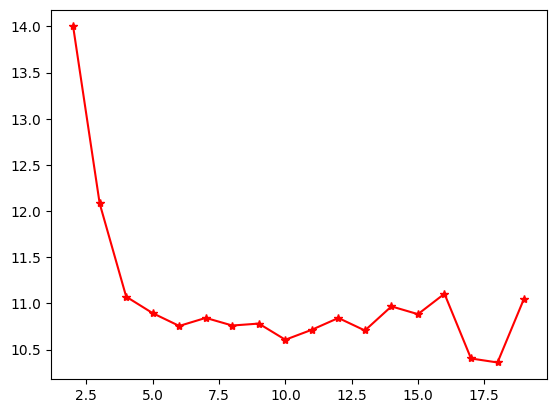

In [18]:
plt.plot(knn/num,"r*-")

## Clustering

In [19]:
np.array(list(dict(nx.clustering(G)).values())).mean()

np.float64(0.011692185884291146)

# Hands on exercises


## Tasks
 0. Load the file `inf-euroroads.edges`
 1. Calculate and plot the degree distribution
 2. Calculate and plot the clustering coefficient as funtions of $k$
 3. Calculate and plot the assortativity
 4. Measure the diameter of the largest component
 5. Do the same for `inf-openflights.edges`
 6. Discuss the differences in a few sentences


In [ ]:
# Load the Euro road network
G_euroroad = nx.read_edgelist('data/inf-euroroad.edges', 
                              comments='%',  # Skip lines starting with %
                              create_using=nx.Graph())  # Create undirected graph
G_openflights = nx.read_edgelist('data/inf-openflights.edges', 
                              comments='%',  # Skip lines starting with %
                              create_using=nx.Graph())  # Create undirected graph




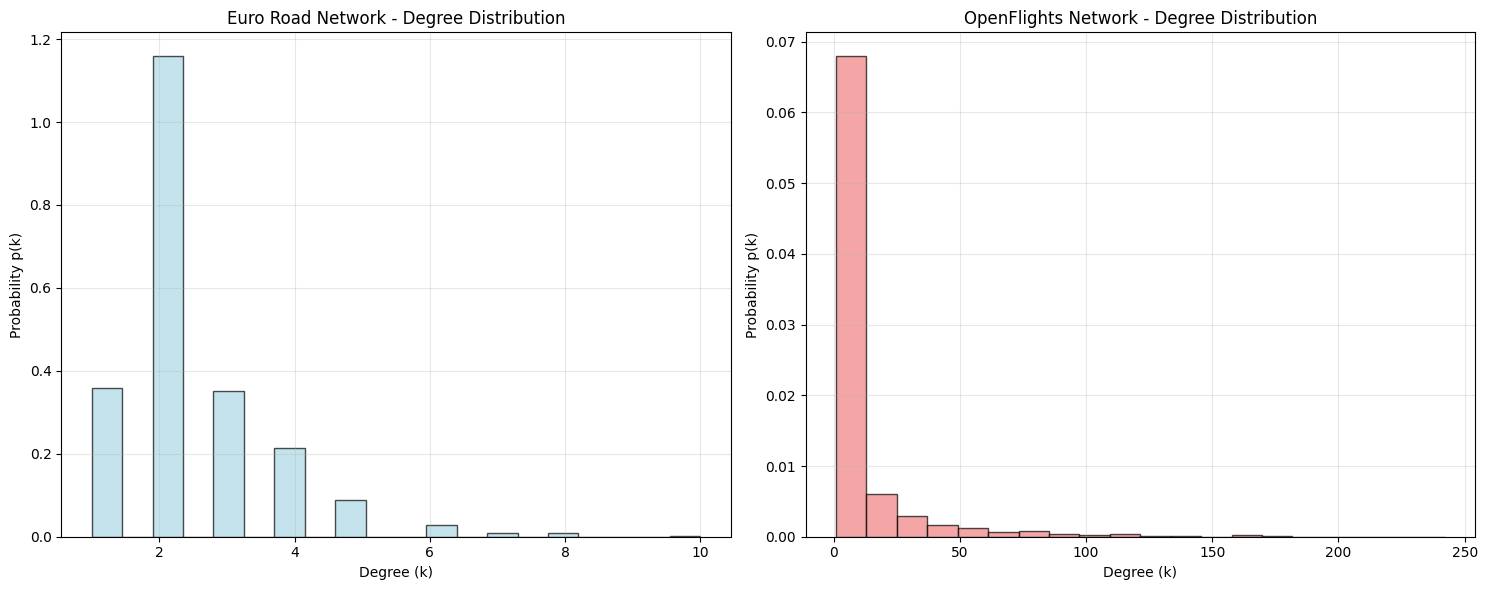

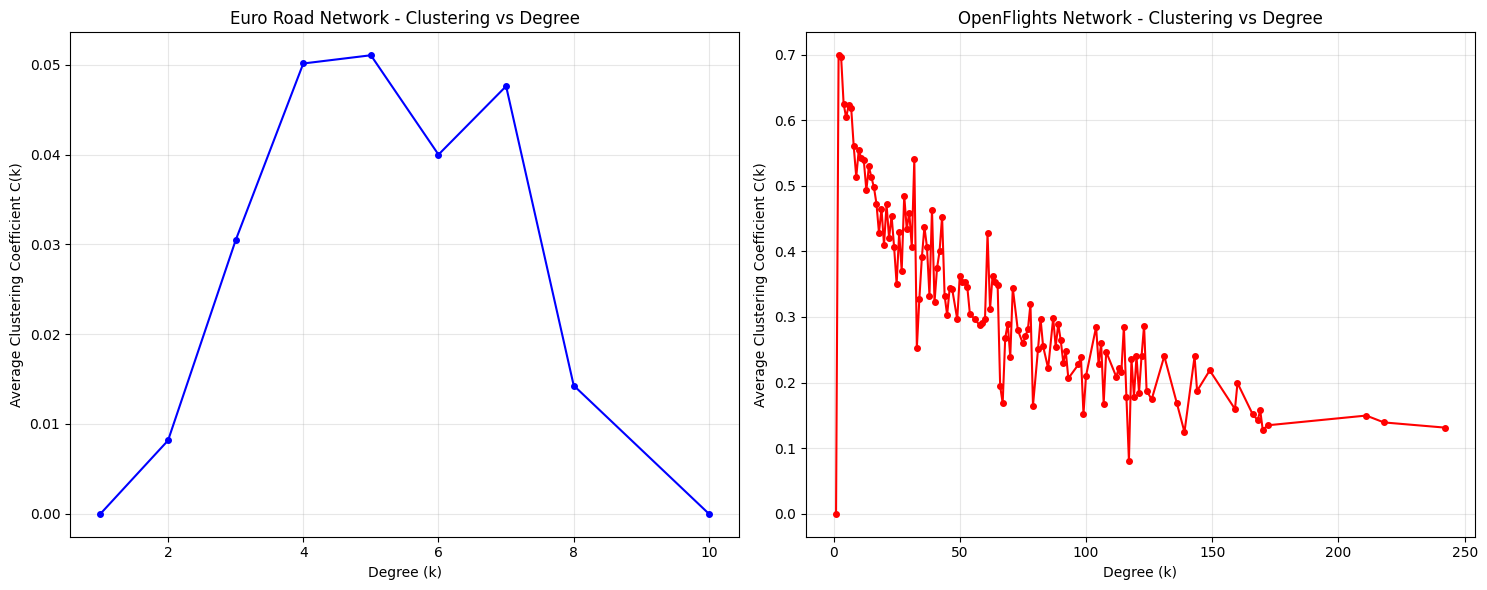

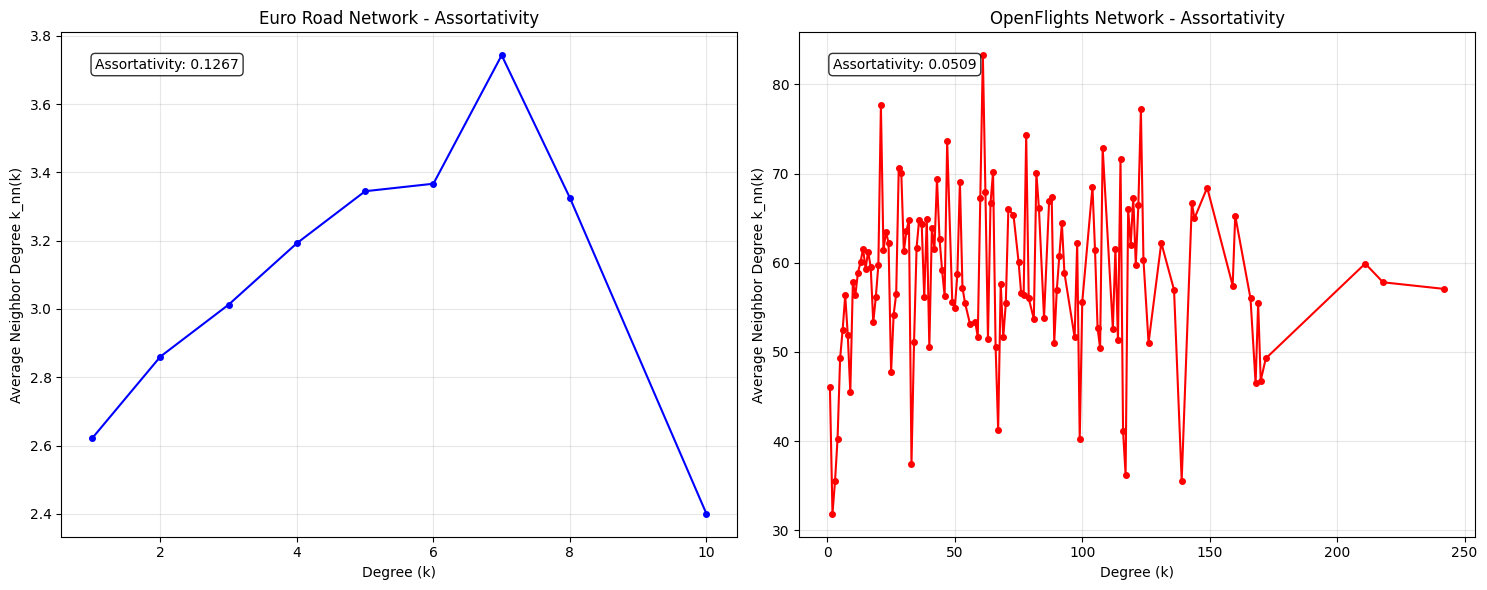

Euro Road Network:
  Total nodes: 1174
  Largest component nodes: 1039
  Diameter: 62
OpenFlights Network:
  Total nodes: 2939
  Largest component nodes: 2905
  Diameter: 14

SUMMARY COMPARISON
Euro Road Network:
  Nodes: 1174
  Edges: 1417
  Density: 0.0021
  Average clustering: 0.0167
  Assortativity: 0.1267
  Diameter: 62

OpenFlights Network:
  Nodes: 2939
  Edges: 15677
  Density: 0.0036
  Average clustering: 0.4526
  Assortativity: 0.0509
  Diameter: 14


In [23]:
# Load the networks
G_euroroad = nx.read_edgelist('data/inf-euroroad.edges', 
                              comments='%', create_using=nx.Graph())
G_openflights = nx.read_edgelist('data/inf-openflights.edges', 
                                 comments='%', create_using=nx.Graph())

# Task 1: Degree Distribution Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Euro road degree distribution
degrees_euroroad = [G_euroroad.degree(n) for n in G_euroroad.nodes()]
ax1.hist(degrees_euroroad, bins=20, density=True, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Degree (k)')
ax1.set_ylabel('Probability p(k)')
ax1.set_title('Euro Road Network - Degree Distribution')
ax1.grid(True, alpha=0.3)

# OpenFlights degree distribution
degrees_openflights = [G_openflights.degree(n) for n in G_openflights.nodes()]
ax2.hist(degrees_openflights, bins=20, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Degree (k)')
ax2.set_ylabel('Probability p(k)')
ax2.set_title('OpenFlights Network - Degree Distribution')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 2: Clustering Coefficient vs Degree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Euro road clustering
clustering_euroroad = nx.clustering(G_euroroad)
k_values_euroroad = []
c_values_euroroad = []
for k in range(max(degrees_euroroad) + 1):
    nodes_with_k = [n for n in G_euroroad.nodes() if G_euroroad.degree(n) == k]
    if len(nodes_with_k) > 0:
        avg_clustering = np.mean([clustering_euroroad[n] for n in nodes_with_k])
        k_values_euroroad.append(k)
        c_values_euroroad.append(avg_clustering)

ax1.plot(k_values_euroroad, c_values_euroroad, 'bo-', markersize=4)
ax1.set_xlabel('Degree (k)')
ax1.set_ylabel('Average Clustering Coefficient C(k)')
ax1.set_title('Euro Road Network - Clustering vs Degree')
ax1.grid(True, alpha=0.3)

# OpenFlights clustering
clustering_openflights = nx.clustering(G_openflights)
k_values_openflights = []
c_values_openflights = []
for k in range(max(degrees_openflights) + 1):
    nodes_with_k = [n for n in G_openflights.nodes() if G_openflights.degree(n) == k]
    if len(nodes_with_k) > 0:
        avg_clustering = np.mean([clustering_openflights[n] for n in nodes_with_k])
        k_values_openflights.append(k)
        c_values_openflights.append(avg_clustering)

ax2.plot(k_values_openflights, c_values_openflights, 'ro-', markersize=4)
ax2.set_xlabel('Degree (k)')
ax2.set_ylabel('Average Clustering Coefficient C(k)')
ax2.set_title('OpenFlights Network - Clustering vs Degree')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 3: Assortativity Comparison
def calculate_assortativity_plot(G, degrees, ax, title, color):
    max_degree = max(degrees)
    knn = np.zeros(max_degree + 1)
    num_nodes = np.zeros(max_degree + 1, dtype=int)
    
    for node in G.nodes():
        k = G.degree(node)
        neighbor_degrees = [G.degree(neighbor) for neighbor in G.neighbors(node)]
        if len(neighbor_degrees) > 0:
            knn[k] += np.mean(neighbor_degrees)
            num_nodes[k] += 1
    
    k_values = []
    knn_values = []
    for k in range(max_degree + 1):
        if num_nodes[k] > 0:
            k_values.append(k)
            knn_values.append(knn[k] / num_nodes[k])
    
    ax.plot(k_values, knn_values, f'{color}o-', markersize=4)
    ax.set_xlabel('Degree (k)')
    ax.set_ylabel('Average Neighbor Degree k_nn(k)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    
    # Calculate and print assortativity coefficient
    assortativity = nx.degree_assortativity_coefficient(G)
    ax.text(0.05, 0.95, f'Assortativity: {assortativity:.4f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    return assortativity

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
assort_euroroad = calculate_assortativity_plot(G_euroroad, degrees_euroroad, ax1, 
                                              'Euro Road Network - Assortativity', 'b')
assort_openflights = calculate_assortativity_plot(G_openflights, degrees_openflights, ax2, 
                                                 'OpenFlights Network - Assortativity', 'r')
plt.tight_layout()
plt.show()

# Task 4: Diameter of Largest Component
def get_diameter_largest_component(G, name):
    largest_cc = max(nx.connected_components(G), key=len)
    G_largest = G.subgraph(largest_cc)
    diameter = nx.diameter(G_largest)
    print(f"{name}:")
    print(f"  Total nodes: {G.number_of_nodes()}")
    print(f"  Largest component nodes: {len(largest_cc)}")
    print(f"  Diameter: {diameter}")
    return diameter

diameter_euroroad = get_diameter_largest_component(G_euroroad, "Euro Road Network")
diameter_openflights = get_diameter_largest_component(G_openflights, "OpenFlights Network")

# Summary comparison
print("\n" + "="*50)
print("SUMMARY COMPARISON")
print("="*50)
print(f"Euro Road Network:")
print(f"  Nodes: {G_euroroad.number_of_nodes()}")
print(f"  Edges: {G_euroroad.number_of_edges()}")
print(f"  Density: {nx.density(G_euroroad):.4f}")
print(f"  Average clustering: {nx.average_clustering(G_euroroad):.4f}")
print(f"  Assortativity: {assort_euroroad:.4f}")
print(f"  Diameter: {diameter_euroroad}")

print(f"\nOpenFlights Network:")
print(f"  Nodes: {G_openflights.number_of_nodes()}")
print(f"  Edges: {G_openflights.number_of_edges()}")
print(f"  Density: {nx.density(G_openflights):.4f}")
print(f"  Average clustering: {nx.average_clustering(G_openflights):.4f}")
print(f"  Assortativity: {assort_openflights:.4f}")
print(f"  Diameter: {diameter_openflights}")

# Discussion

## Degree distribution

From the histograms, the airport network spans a much wider range of degrees than EuroRoad. A large share of airports have ≤10 connections, but there’s a long tail with high-degree hubs, which is what you would expect from a hub system. By contrast, EuroRoad is narrowly distributed with a max k value of degree 10, and many nodes of degree 2 (road segments between intersections).

The summary stats back this up:

- EuroRoad: \(N=1174\), \(E=1417\), density \(=0.0021\)
- OpenFlights: \(N=2939\), \(E=15677\), density \(=0.0036\) 

Note that the higher average degree in OpenFlights is due to many more edges per node (design + fewer physical constraints), not because the network is larger. These hubs also explain the much smaller diameter in the largest component: 14 for OpenFlights versus 62 for EuroRoad. In other words, even though both graphs are sparse, the airline graph still keeps typical paths short, while the road graph-constrained by geography-does not.

## Clustering

Clustering diverges sharply:

- EuroRoad: average clustering 1.67% -> very few triangles; most places have just a couple of ways in/out.  
- OpenFlights: average clustering 45.26% -> many triangles; airports in the same region commonly interconnect.

In the \(C(k)\) plot, lower-clustering nodes in OpenFlights tend to be large hubs that connect many otherwise unconnected regions—classic behavior where clustering often decreases with node degree. For EuroRoad, most nodes have low clustering (degree-2 chains dominate), so finding very short routes is harder. From analyzing the clustering graph, I gather that hubs in OpenFlights substantially shorten paths, while EuroRoad’s low clustering plus planarity constraints keep the network stretched out.

## Assortativity

The coefficients show:

- EuroRoad: \(r = 0.1267\) (more positively assortative).  
- OpenFlights: \(r = 0.0509\) (weakly positive / near-neutral).

So EuroRoad exhibits a stronger tendency for similar-degree nodes to connect (high-degree cities linking to other high-degree cities), which fits regional hierarchies in a road system. OpenFlights is only weakly assortative—consistent with many links between small airports and big hubs—so \(k\) and average neighbor degree correlate less tightly. This hub-spoke mixing helps keep path lengths short even for low-degree airports.
